In [525]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [526]:
df = pd.read_csv('/content/drive/MyDrive/DEEP LEARNING/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [528]:
df.duplicated().sum()

0

In [529]:
df['Exited'].value_counts()


,count
Exited,
0,7963
1,2037


In [530]:
df['Geography'].value_counts()


,count
Geography,
France,5014
Germany,2509
Spain,2477


In [531]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [532]:
df.drop(columns = ['RowNumber' , 'CustomerId' , 'Surname'] , inplace = True)

In [533]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [534]:
df = pd.get_dummies(df, columns=['Geography' , 'Gender'] , drop_first= True)

In [535]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [536]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Exited'])
y = df['Exited']

X_train , X_test  , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [537]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False


In [538]:
X_train.shape

(8000, 11)

In [539]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [540]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [541]:
model = Sequential()

model.add(Dense(11 , activation = 'relu' , input_dim = 11))
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

In [542]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 5)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198 (792.00 B)

 Trainable params: 198 (792.00 B)

 Non-trainable params: 0 (0.00 B)

In [543]:
model.compile(optimizer = 'Adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [544]:
history = model.fit(X_train , y_train ,epochs = 25 , verbose = 1 , validation_split = 0.2)

Epoch 1/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7206 - loss: 0.6045 - val_accuracy: 0.7994 - val_loss: 0.5039
Epoch 2/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8005 - loss: 0.4798 - val_accuracy: 0.8081 - val_loss: 0.4585
Epoch 3/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8110 - loss: 0.4472 - val_accuracy: 0.8144 - val_loss: 0.4439
Epoch 4/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8163 - loss: 0.4318 - val_accuracy: 0.8144 - val_loss: 0.4373
Epoch 5/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8156 - loss: 0.4270 - val_accuracy: 0.8200 - val_loss: 0.4318
Epoch 6/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8164 - loss: 0.4268 - val_accuracy: 0.8156 - val_loss: 0.4283
Epoch 7/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8311 - loss: 0.4052 - val_accuracy: 0.8225 - val_loss: 0.4230
Epoch 8/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8189 - loss: 0.4170 - val_accuracy: 0.

In [545]:
model.layers[0].get_weights()

[array([[-0.03220773, -0.04622352, -0.177157  , -0.34387416,  0.3971332 ,
          0.22658023, -0.06449915, -0.06351034, -0.2097974 , -0.03422438,
         -0.1682781 ],
        [-0.6709587 , -0.55886155, -0.67618227,  0.47416875,  0.30058402,
          0.1106476 , -0.8770131 ,  0.90872836, -0.00806769,  0.20458971,
          0.17052004],
        [ 0.10724479,  0.24987762,  0.24659556,  0.00188003, -0.16202638,
          0.17042519, -0.24448425,  0.08305883, -0.02469661,  0.36532435,
          0.02244363],
        [-0.7978434 ,  0.00736261,  0.5665577 , -0.27211648,  0.02022409,
         -0.3357854 ,  0.32730442,  0.21119641,  0.11678913, -1.127998  ,
          0.8159139 ],
        [ 0.5664493 ,  0.07665709,  0.35190535, -1.1494069 , -0.6098049 ,
         -0.08368722, -0.13288079,  1.0294608 , -0.27582213, -0.71674037,
         -0.47558787],
        [-0.23681545,  0.10563134,  0.0309358 , -0.0644298 ,  0.20798172,
          0.565781  ,  0.1185961 ,  0.09397577, -0.3023679 , -0.2340961

In [546]:
y_prob = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [547]:
y_pred = np.where(y_prob > 0.5 , 1 , 0)

In [548]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.858

In [549]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

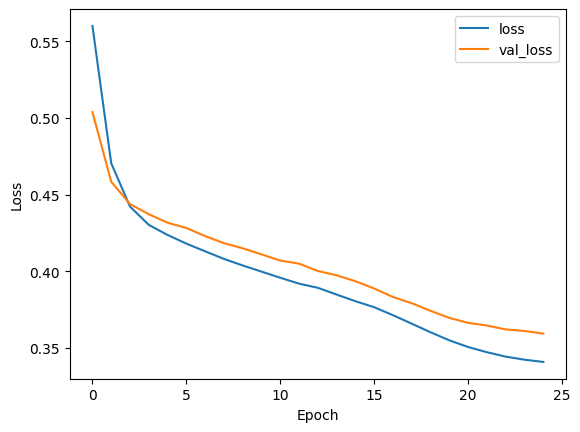

In [550]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss' , 'val_loss'])

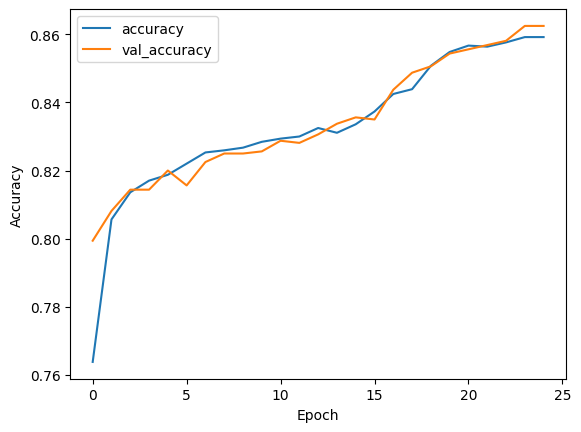

In [551]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy' , 'val_accuracy'])

# LOADED SAVE MODELS

In [552]:
model.save('customer_churn_model.h5')

In [553]:
from tensorflow.keras.models import load_model

loaded_model = load_model('customer_churn_model.h5')


In [554]:
custom_input = {
    'CreditScore': 700,
    'Geography_Germany': 0,
    'Geography_Spain':1,# Example category
    'Gender': 'Male',       # Example category
    'Age': 40,
    'Tenure': 5,
    'Balance': 50000.0,
    'NumOfProducts': 2,
    'HasCrCard': 1,          # 1 for Yes, 0 for No
    'IsActiveMember': 1,     # 1 for Yes, 0 for No
    'EstimatedSalary': 60000.0
}

custom_input_df = pd.DataFrame([custom_input])
# custom_input_df = pd.get_dummies(custom_input_df, columns=['Geography', 'Gender'])
custom_input_df.head()



,CreditScore,Geography_Germany,Geography_Spain,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,700,0,1,Male,40,5,50000.0,2,1,1,60000.0


CreditScore	Age	Tenure	Balance	NumOfProducts	HasCrCard	IsActiveMember	EstimatedSalary	Geography_Germany	Geography_Spain	Gender_Male

In [555]:
from re import M
# Assuming you have the original column names in a separate list, e.g., `original_columns`
original_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                    'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']


# Add any missing columns to custom_input_df
missing_cols = set(original_columns) - set(custom_input_df.columns)
print(missing_cols)
for col in missing_cols:
    custom_input_df[col] = 0

# Reorder the columns to match the original feature order
custom_input_df = custom_input_df[original_columns]
custom_input_df.head()


{'Gender_Male'}


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,700,40,5,50000.0,2,1,1,60000.0,0,1,0


In [556]:
custom_input_scaled = scaler.transform(custom_input_df)


prediction = loaded_model.predict(custom_input_scaled)
prediction_binary = (prediction > 0.5).astype(int)

print(f'Predicted value (probability): {prediction[0][0]}')
print(f'Predicted class (0 or 1): {prediction_binary[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted value (probability): 0.04966640844941139
Predicted class (0 or 1): 0
